# Symmetric Mean Absolute Percentage Error

**Symmetric Mean Absolute Percentage Error** (SMAPE) is a statistical measure used to evaluate the accuracy of forecasted or predicted values in comparison to the actual values. SMAPE is commonly used in forecasting, demand planning, and time series analysis.

The formula for SMAPE is as follows:

$$
SMAPE = \frac{{1}}{{n}} \sum_{i=1}^{N} \frac{{\mid y_{i} - \hat y_{i} \mid}}{{(\mid y_{i} \mid + \mid \hat y_{i} \mid) \space / \space2}} \times 100\%
$$



In this formula, $N$ represents the total number of samples, $y_{i}$ is the actual value, and $\hat{y}_{i}$ is the predicted value.

Symmetric Mean Absolute Percentage Error is calculated by taking the absolute difference between the predicted and true values, dividing it by the sum of their absolute values, and multiplying by 100% to express the error as a percentage.

Symmetric Mean Absolute Percentage Error represents the average of individual percentage errors, thus providing a measure of accuracy that <u>considers both overestimation and underestimation errors equally</u>.

**The SMAPE value ranges from 0% to 200%**. A lower SMAPE indicates a better forecast accuracy, with 0% representing a perfect match between the forecasted and actual values.

### Additional insights about SMAPE:

1. **Symmetry**: SMAPE is designed to be symmetric, meaning it considers both overestimation and underestimation errors equally. This is achieved by using the absolute values in the numerator and denominator.

2. **Interpretation**: SMAPE is useful for comparing the accuracy of different forecasting models or methods. It provides a standardized measure that can be easily interpreted and compared across different datasets.

3. **Percentage Error**: SMAPE expresses the error as a percentage of the forecasted and actual values. This makes it easier to understand the relative magnitude of the error compared to the size of the values being forecasted.

4. **Unitless Measure**: <span style="font-size: 11pt; color: green; font-weight: normal">SMAPE is a unitless measure</span>, making it easier to interpret and compare across different datasets, variables, or industries.

5. **Usage in Ensemble Forecasting**: <span style="font-size: 11pt; color: green; font-weight: normal">SMAPE is often used as an evaluation metric in ensemble forecasting</span>, where multiple forecasting models are combined to improve accuracy. SMAPE helps assess the effectiveness of the ensemble method by comparing its performance against individual models or other benchmarking methods.

**Below we will create a function to compute Symmetric Mean Absolute Percentage Error using Numpy.**

### Importing libraries

In [1]:
import numpy as np

### Generating sythetic time series data with an upward trend

In [2]:
# Simulated true and predicted values

# Set the random seed for reproducibility
np.random.seed(42)

# Generate 100 data points with an upward trend 
x = np.linspace(0, 1, 100)
trend = 10 * x  # Adjust the trend as needed
noise = np.random.normal(0, 300, size=100)  # Adjust the noise parameters as needed
y_true = 100 + trend * (500 - 100) + noise

# Generate 100 data points with an upward trend
x = np.linspace(0, 1, 100)
trend = 10 * x  # Adjust the trend as needed
noise = np.random.normal(0, 100, size=100)  # Adjust the noise parameters as needed
y_pred = 100 + trend * (500 - 100) + noise

### Cumputing sMAPE via the custom function

In [3]:
# Create a custom function to compute sMAPE
def sMAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    assert y_true.shape[0] == y_pred.shape[0], 'y_true and y_pred should have equal number of items'
    N = y_true.shape[0]
    enom = np.abs(y_true - y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    sMAPE = np.sum((enom / denom) / N) * 100
    return round(sMAPE, 2)

# Calculate SMAPE
sMAPE = sMAPE(y_true, y_pred)

print('Symmetric Mean Absolute Percentage Error:', sMAPE)

Symmetric Mean Absolute Percentage Error: 21.42


### Let's plot the results of prediction:

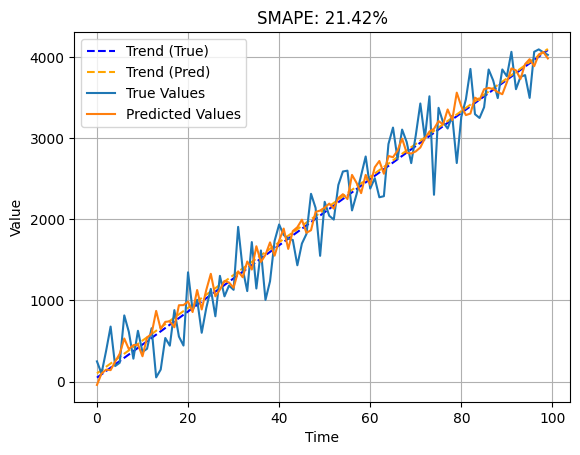

In [5]:
import matplotlib.pyplot as plt

# Plot the true values and predicted values with error bars
plt.errorbar(range(len(y_true)), y_true, label='True Values', linestyle='-')
plt.errorbar(range(len(y_pred)), y_pred, label='Predicted Values', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'SMAPE: {sMAPE}%')
plt.legend()

# Add trend line
trendline_true = np.poly1d(np.polyfit(range(len(y_true)), y_true, 1))
trendline_pred = np.poly1d(np.polyfit(range(len(y_pred)), y_pred, 1))
plt.plot(range(len(y_true)), trendline_true(range(len(y_true))), linestyle='--', color='blue', label='Trend (True)')
plt.plot(range(len(y_pred)), trendline_pred(range(len(y_pred))), linestyle='--', color='orange', label='Trend (Pred)')

plt.grid(True)
plt.legend()
plt.show()

SMAPE value is 21.42%, indicating the average percentage error between the predicted values and the true values.

A lower SMAPE value indicates a better forecast accuracy. In this scenario, a SMAPE value of 21.42% suggests that, on average, the predicted values deviate from the true values by approximately 21.42%.